In [8]:
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
import sys
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Merge, Reshape, Dropout
from keras.layers.embeddings import Embedding
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
%matplotlib inline

In [9]:
print "Python version: "+sys.version
print "Pandas version: "+pd.__version__
print "Matplotlib version: "+matplotlib.__version__
np.random.seed(12345)

Python version: 2.7.6 (default, Jun 22 2015, 17:58:13) 
[GCC 4.8.2]
Pandas version: 0.18.1
Matplotlib version: 1.3.1


## Importing customer data

In [3]:
train=pd.read_csv('train_ver2.csv')
test=pd.read_csv('test_ver2.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
print "Number of train points :",  train.shape[0]
print "Number of test point :", test.shape[0]

Number of train points : 13647309
Number of test point : 929615


In [6]:
train_customers = train[['ncodpers']]

In [7]:
print "Number of unique customers in train ", len(train.ncodpers.unique())
print "Number of unique customers in test ", len(test.ncodpers.unique())

Number of unique customers in train  956645
Number of unique customers in test  929615


## Targer columns in the dataset

1. ind_ahor_fin_ult1     = Saving Account
2. ind_aval_fin_ult1     = Guarantees
3. ind_cco_fin_ult1      = Current Accounts
4. ind_cder_fin_ult1     = Derivada Account
5. ind_cno_fin_ult1	     = Payroll Account
6. ind_ctju_fin_ult1	 = Junior Account
7. ind_ctma_fin_ult1	 = Más particular Account
8. ind_ctop_fin_ult1	 = particular Account
9. ind_ctpp_fin_ult1	 = particular Plus Account
10. ind_deco_fin_ult1	 = Short-term deposits
11. ind_deme_fin_ult1	 = Medium-term deposits
12. ind_dela_fin_ult1	 = Long-term deposits
13. ind_ecue_fin_ult1	 = e-account
14. ind_fond_fin_ult1	 = Funds
15. ind_hip_fin_ult1	 = Mortgage
16. ind_plan_fin_ult1	 = Pensions
17. ind_pres_fin_ult1	 = Loans
18. ind_reca_fin_ult1	 = Taxes
19. ind_tjcr_fin_ult1	 = Credit Card
20. ind_valo_fin_ult1	 = Securities
21. ind_viv_fin_ult1	 = Home Account
22. ind_nomina_ult1	     = Payroll
23. ind_nom_pens_ult1	 = Pensions
24. ind_recibo_ult1	     = Direct Debit

In [10]:
train_target=pd.read_csv("train_ver2.csv", dtype='float16', 
                    usecols=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
                             'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1'])

In [11]:
train_target

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
target_count=train_target.astype('float64').sum(axis=0)

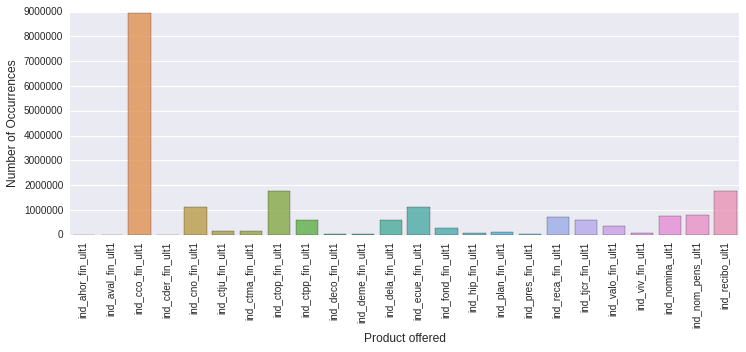

In [13]:
plt.figure(figsize=(12,4))
sns.barplot(target_count.index,target_count.values, alpha=0.8)
plt.xlabel('Product offered', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
# mapping dict to map the categories to numerical values #
mapping_dict = {
'ind_empleado' 	: {'N':0, -99:1, 'B':2, 'F':3, 'A':4, 'S':5},
'sexo' 			: {'V':0, 'H':1, -99:2},
'ind_nuevo' 	: {0.0:0, 1.0:1, -99.0:2},
'indrel'		: {1.0:0, 99.0:1, -99.0:2},
'indrel_1mes'	: {-99:0, 1.0:1, 1:1, 2.0:2, 2:2, 3.0:3, 3:3, 4.0:4, 4:4, 'P':5},
'tiprel_1mes'	: {-99:0, 'I':1, 'A':2, 'P':3, 'R':4, 'N':5},
'indresi'		: {-99:0, 'S':1, 'N':2},
'indext'		: {-99:0, 'S':1, 'N':2},
'conyuemp'		: {-99:0, 'S':1, 'N':2},
'indfall'		: {-99:0, 'S':1, 'N':2},
'tipodom'		: {-99.0:0, 1.0:1},
'ind_actividad_cliente' : {0.0:0, 1.0:1, -99.0:2},
'segmento'		: {'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, -99:2},
'pais_residencia' : {'LV': 102, 'BE': 12, 'BG': 50, 'BA': 61, 'BM': 117, 'BO': 62, 'JP': 82, 'JM': 116, 'BR': 17, 'BY': 64, 'BZ': 113, 'RU': 43, 'RS': 89, 'RO': 41, 'GW': 99, 'GT': 44, 'GR': 39, 'GQ': 73, 'GE': 78, 'GB': 9, 'GA': 45, 'GN': 98, 'GM': 110, 'GI': 96, 'GH': 88, 'OM': 100, 'HR': 67, 'HU': 106, 'HK': 34, 'HN': 22, 'AD': 35, 'PR': 40, 'PT': 26, 'PY': 51, 'PA': 60, 'PE': 20, 'PK': 84, 'PH': 91, 'PL': 30, 'EE': 52, 'EG': 74, 'ZA': 75, 'EC': 19, 'AL': 25, 'VN': 90, 'ET': 54, 'ZW': 114, 'ES': 0, 'MD': 68, 'UY': 77, 'MM': 94, 'ML': 104, 'US': 15, 'MT': 118, 'MR': 48, 'UA': 49, 'MX': 16, 'IL': 42, 'FR': 8, 'MA': 38, 'FI': 23, 'NI': 33, 'NL': 7, 'NO': 46, 'NG': 83, 'NZ': 93, 'CI': 57, 'CH': 3, 'CO': 21, 'CN': 28, 'CM': 55, 'CL': 4, 'CA': 2, 'CG': 101, 'CF': 109, 'CD': 112, 'CZ': 36, 'CR': 32, 'CU': 72, 'KE': 65, 'KH': 95, 'SV': 53, 'SK': 69, 'KR': 87, 'KW': 92, 'SN': 47, 'SL': 97, 'KZ': 111, 'SA': 56, 'SG': 66, 'SE': 24, 'DO': 11, 'DJ': 115, 'DK': 76, 'DE': 10, 'DZ': 80, 'MK': 105, -99: 1, 'LB': 81, 'TW': 29, 'TR': 70, 'TN': 85, 'LT': 103, 'LU': 59, 'TH': 79, 'TG': 86, 'LY': 108, 'AE': 37, 'VE': 14, 'IS': 107, 'IT': 18, 'AO': 71, 'AR': 13, 'AU': 63, 'AT': 6, 'IN': 31, 'IE': 5, 'QA': 58, 'MZ': 27},
'canal_entrada' : {'013': 49, 'KHP': 160, 'KHQ': 157, 'KHR': 161, 'KHS': 162, 'KHK': 10, 'KHL': 0, 'KHM': 12, 'KHN': 21, 'KHO': 13, 'KHA': 22, 'KHC': 9, 'KHD': 2, 'KHE': 1, 'KHF': 19, '025': 159, 'KAC': 57, 'KAB': 28, 'KAA': 39, 'KAG': 26, 'KAF': 23, 'KAE': 30, 'KAD': 16, 'KAK': 51, 'KAJ': 41, 'KAI': 35, 'KAH': 31, 'KAO': 94, 'KAN': 110, 'KAM': 107, 'KAL': 74, 'KAS': 70, 'KAR': 32, 'KAQ': 37, 'KAP': 46, 'KAW': 76, 'KAV': 139, 'KAU': 142, 'KAT': 5, 'KAZ': 7, 'KAY': 54, 'KBJ': 133, 'KBH': 90, 'KBN': 122, 'KBO': 64, 'KBL': 88, 'KBM': 135, 'KBB': 131, 'KBF': 102, 'KBG': 17, 'KBD': 109, 'KBE': 119, 'KBZ': 67, 'KBX': 116, 'KBY': 111, 'KBR': 101, 'KBS': 118, 'KBP': 121, 'KBQ': 62, 'KBV': 100, 'KBW': 114, 'KBU': 55, 'KCE': 86, 'KCD': 85, 'KCG': 59, 'KCF': 105, 'KCA': 73, 'KCC': 29, 'KCB': 78, 'KCM': 82, 'KCL': 53, 'KCO': 104, 'KCN': 81, 'KCI': 65, 'KCH': 84, 'KCK': 52, 'KCJ': 156, 'KCU': 115, 'KCT': 112, 'KCV': 106, 'KCQ': 154, 'KCP': 129, 'KCS': 77, 'KCR': 153, 'KCX': 120, 'RED': 8, 'KDL': 158, 'KDM': 130, 'KDN': 151, 'KDO': 60, 'KDH': 14, 'KDI': 150, 'KDD': 113, 'KDE': 47, 'KDF': 127, 'KDG': 126, 'KDA': 63, 'KDB': 117, 'KDC': 75, 'KDX': 69, 'KDY': 61, 'KDZ': 99, 'KDT': 58, 'KDU': 79, 'KDV': 91, 'KDW': 132, 'KDP': 103, 'KDQ': 80, 'KDR': 56, 'KDS': 124, 'K00': 50, 'KEO': 96, 'KEN': 137, 'KEM': 155, 'KEL': 125, 'KEK': 145, 'KEJ': 95, 'KEI': 97, 'KEH': 15, 'KEG': 136, 'KEF': 128, 'KEE': 152, 'KED': 143, 'KEC': 66, 'KEB': 123, 'KEA': 89, 'KEZ': 108, 'KEY': 93, 'KEW': 98, 'KEV': 87, 'KEU': 72, 'KES': 68, 'KEQ': 138, -99: 6, 'KFV': 48, 'KFT': 92, 'KFU': 36, 'KFR': 144, 'KFS': 38, 'KFP': 40, 'KFF': 45, 'KFG': 27, 'KFD': 25, 'KFE': 148, 'KFB': 146, 'KFC': 4, 'KFA': 3, 'KFN': 42, 'KFL': 34, 'KFM': 141, 'KFJ': 33, 'KFK': 20, 'KFH': 140, 'KFI': 134, '007': 71, '004': 83, 'KGU': 149, 'KGW': 147, 'KGV': 43, 'KGY': 44, 'KGX': 24, 'KGC': 18, 'KGN': 11},
#'nomprov' : {'ZARAGOZA': 2, 'BURGOS': 11, 'GRANADA': 46, 'MADRID': 18, 'CIUDAD REAL': 1, 'GIRONA': 7, 'TARRAGONA': 50, 'LEON': 4, 'SORIA': 20, 'SANTA CRUZ DE TENERIFE': 48, 'CEUTA': 52, 'HUESCA': 12, 'VALLADOLID': 24, 'LERIDA': 17, 'ZAMORA': 8, 'CUENCA': 31, 'RIOJA, LA': 34, 'TERUEL': 27, 'PONTEVEDRA': 25, 'MELILLA': 49, 'CORDOBA': 44, 'SEVILLA': 21, -99: 39, 'ALICANTE': 19, 'CASTELLON': 33, 'OURENSE': 29, 'VALENCIA': 26, 'CORU\xc3\x91A, A':28, 'CORUNA, A': 28, 'HUELVA': 45, 'ALBACETE': 35, 'JAEN': 30, 'CADIZ': 38, 'BADAJOZ': 36, 'TOLEDO': 3, 'AVILA': 14, 'BARCELONA': 9, 'SEGOVIA': 15, 'NAVARRA': 13, 'MALAGA': 0, 'SALAMANCA': 10, 'PALENCIA': 42, 'ALMERIA': 40, 'MURCIA': 37, 'GUADALAJARA': 41, 'ASTURIAS': 47, 'BALEARS, ILLES': 23, 'ALAVA': 51, 'LUGO': 16, 'CANTABRIA': 22, 'CACERES': 6, 'PALMAS, LAS': 43, 'GIPUZKOA': 5, 'BIZKAIA': 32}
}

In [48]:
# dtype list for columns to be used for reading #
dtype_list = {'ind_cco_fin_ult1': 'float16', 'ind_deme_fin_ult1': 'float16', 'ind_aval_fin_ult1': 'float16', 'ind_valo_fin_ult1': 'float16', 'ind_reca_fin_ult1': 'float16', 'ind_ctju_fin_ult1': 'float16', 'ind_cder_fin_ult1': 'float16', 'ind_plan_fin_ult1': 'float16', 'ind_fond_fin_ult1': 'float16', 'ind_hip_fin_ult1': 'float16', 'ind_pres_fin_ult1': 'float16', 'ind_nomina_ult1': 'float16', 'ind_cno_fin_ult1': 'float16', 'ncodpers': 'int64', 'ind_ctpp_fin_ult1': 'float16', 'ind_ahor_fin_ult1': 'float16', 'ind_dela_fin_ult1': 'float16', 'ind_ecue_fin_ult1': 'float16', 'ind_nom_pens_ult1': 'float16', 'ind_recibo_ult1': 'float16', 'ind_deco_fin_ult1': 'float16', 'ind_tjcr_fin_ult1': 'float16', 'ind_ctop_fin_ult1': 'float16', 'ind_viv_fin_ult1': 'float16', 'ind_ctma_fin_ult1': 'float16'}

In [49]:
# categorical columns to use
cols_to_use = list(mapping_dict.keys())

In [50]:
print cols_to_use

['conyuemp', 'segmento', 'indrel_1mes', 'indfall', 'indrel', 'sexo', 'tipodom', 'ind_empleado', 'canal_entrada', 'indext', 'ind_actividad_cliente', 'indresi', 'pais_residencia', 'ind_nuevo', 'tiprel_1mes']


In [51]:
# numerical columns to use
numerical_cols = ['age', 'antiguedad', 'renta']
num_min_values = np.array([-1., -999999., -1.])
num_max_values = np.array([164., 256., 28894395.51])
num_range_values = np.array([  1.65000000e+02,   1.00025500e+06,   2.88943965e+07])

In [52]:
# target columns to predict, using from training data
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

In [53]:
print target_cols

['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [54]:
# one hot encode fit for all the categorical variables #
ohes = []
feat_count = 0
for col in cols_to_use:
    ohe = preprocessing.OneHotEncoder()
    ohe.fit(np.array(list(mapping_dict[col].values())).reshape(-1,1))
    feat_count += ohe.n_values_[0]
    print(col, feat_count)
    ohes.append(ohe)
feat_count += len(numerical_cols)

('conyuemp', 3)
('segmento', 6)
('indrel_1mes', 12)
('indfall', 15)
('indrel', 18)
('sexo', 21)
('tipodom', 23)
('ind_empleado', 29)
('canal_entrada', 192)
('indext', 195)
('ind_actividad_cliente', 198)
('indresi', 201)
('pais_residencia', 320)
('ind_nuevo', 323)
('tiprel_1mes', 329)


In [55]:
def batch_generator(file_name, batch_size, shuffle, train_input=True):
	while (True):
		if train_input:
			chunked_df = pd.read_csv(file_name, usecols=['ncodpers']+cols_to_use+numerical_cols+target_cols, chunksize=batch_size)
		else:
			chunked_df = pd.read_csv(file_name, usecols=['ncodpers']+cols_to_use+numerical_cols, chunksize=batch_size)

		nrows = 0
		for chunk_df in chunked_df:
			chunk_X = chunk_df[cols_to_use]
			chunk_X = chunk_X.fillna(-99)
			for col_ind, col in enumerate(cols_to_use):
				chunk_X[col] = chunk_X[col].apply(lambda x: mapping_dict[col][x])
				ohe = ohes[col_ind]
				temp_X = ohe.transform( np.array(chunk_X[col]).reshape(-1,1) )
				if col_ind == 0:
					X = temp_X.todense().copy()
				else:
					X = np.hstack((X, temp_X.todense()))
					
			chunk_X = chunk_df[numerical_cols]
			for ind, col in enumerate(numerical_cols):
				if chunk_X[col].dtype == 'object':
					chunk_X[col] = chunk_X[col].map(str.strip).replace(['NA'], value=-1).fillna(-1).astype('float64')
				else:
					chunk_X[col] = chunk_X[col].fillna(-1).astype('float64')
				chunk_X[col] = (chunk_X[col] - num_min_values[ind]) / num_range_values[ind]
			chunk_X = np.array(chunk_X).astype('float64')
			X = np.hstack((X, chunk_X))

			if train_input:
				y = np.array(chunk_df[target_cols].fillna(0))

			if shuffle:
				shuffle_index = np.random.shuffle(np.arange(X.shape[0]))
				X = X[shuffle_index,:]
				if train_input:
					y = y[shuffle_index,:]

			if train_input:
				yield X, y
			else:
				yield X

			nrows += batch_size
			if train_input and nrows >= train_size:
				break


In [56]:
def keras_model():
    # keras model architecture #
    final_model = Sequential()
    final_model.add(Dense(100, input_dim=feat_count, init='he_uniform'))
    final_model.add(Activation('relu'))
    final_model.add(Dense(100, input_dim=feat_count, init='he_uniform'))
    final_model.add(Activation('relu'))
    final_model.add(Dense(len(target_cols), init='zero'))
    final_model.add(Activation('relu'))
    final_model.compile(loss='binary_crossentropy', optimizer='sgd')
    return final_model

In [57]:
train = "train_ver2.csv"
test = "test_ver2.csv"

In [58]:
#train_size = 13647309
train_size = 13647309
#train_size = 1000000
test_size = 929615

In [59]:
train_size

13647309

In [60]:
print("Initialize the model..")
model = keras_model()
print("Model fit..")
fit= model.fit_generator(generator = batch_generator(train, 500, False), nb_epoch = 1,samples_per_epoch = train_size)

Initialize the model..
Model fit..
Epoch 1/1


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

 1182000/13647309 [=>............................] - ETA: 18099s - loss: 1.2102

KeyboardInterrupt: 

In [ ]:
preds = model.predict_generator(generator=batch_generator(test, 10000, False, False), val_samples=test_size)
print("Predictions : ", preds.shape)

In [ ]:
last_instance_df = pd.read_csv(train, usecols=['ncodpers']+target_cols, dtype=dtype_list)
last_instance_df = last_instance_df.drop_duplicates('ncodpers', keep='last')
last_instance_df = last_instance_df.fillna(0).astype('int')
cust_dict = {}
target_cols = np.array(target_cols)
for ind, row in last_instance_df.iterrows():
	cust = row['ncodpers']
	used_products = set(target_cols[np.array(row[1:])==1])
	cust_dict[cust] = used_products
del last_instance_df

In [ ]:
target_cols = np.array(target_cols)
preds = np.argsort(preds, axis=1)
preds = np.fliplr(preds)
test_id = np.array(pd.read_csv(test, usecols=['ncodpers'])['ncodpers'])
final_preds = []
for ind, pred in enumerate(preds):
	cust = test_id[ind]
	top_products = target_cols[pred]
	used_products = cust_dict.get(cust,[])
	new_top_products = []
	for product in top_products:
		if product not in used_products:
			new_top_products.append(product)
		if len(new_top_products) == 7:
			break
	final_preds.append(" ".join(new_top_products))
out_df = pd.DataFrame({'ncodpers':test_id, 'added_products':final_preds})
out_df.to_csv('baseline_keras_v2.csv', index=False)